# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take a **Pandas DataFrame** and a degree and return an **Pandas DataFrame** where each column is the input DataFrame to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

# Imports

In [1]:
#Standard libs
import pandas as pd
import numpy as np

In [2]:
# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

Next we're going to write a polynomial function that takes an **Pandas DataFrame** and a maximal degree and returns a **Pandas DataFrame** with columns containing the input DataFrame to all the powers up to the maximal degree.

Let's no use the apply() function as stated in  the course, but standard numpy/pandas function, i.e. pd.pow()

In [4]:
tmp = np.array([[1.],[1.5],[2.],[2.5],[3.],[3.5],[4]])
tmp_cubed = np.power(tmp,3)
print("tmp:",tmp)
print("tmp_cubed:",tmp_cubed)

tmp: [[ 1. ]
 [ 1.5]
 [ 2. ]
 [ 2.5]
 [ 3. ]
 [ 3.5]
 [ 4. ]]
tmp_cubed: [[  1.   ]
 [  3.375]
 [  8.   ]
 [ 15.625]
 [ 27.   ]
 [ 42.875]
 [ 64.   ]]


Similarly for pandas DataFrame

In [5]:
df_tmp = pd.DataFrame(tmp,columns=["feature"])
df_tmp['power_2'] = df_tmp.pow(3)
print("df_tmp:",df_tmp)

df_tmp:    feature  power_2
0      1.0    1.000
1      1.5    3.375
2      2.0    8.000
3      2.5   15.625
4      3.0   27.000
5      3.5   42.875
6      4.0   64.000


# Polynomial DataFrame function

Using the hints above complete the following function to create **a DataFrame** consisting of the powers of an input DataFrame up to a specific degree:

In [6]:
def polynomial_dframe(feature, degree):
    # assume that degree >= 1
    # initialize the DataFram, setting the first column's name to "power_1"
    poly_dframe = feature.rename(columns={feature.columns.values[0]:"power_1"})

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dframe[name] = poly_dframe["power_1"].pow(power)
    return poly_dframe

To test your function consider the smaller **df_tmp** DataFrame and what you would expect the outcome of the following call:

In [7]:
df_tmp = pd.DataFrame(tmp,columns=["feature"])
print("polynomial_dframe(df_tmp, 3):",polynomial_dframe(df_tmp, 3))

polynomial_dframe(df_tmp, 3):    power_1  power_2  power_3
0      1.0     1.00    1.000
1      1.5     2.25    3.375
2      2.0     4.00    8.000
3      2.5     6.25   15.625
4      3.0     9.00   27.000
5      3.5    12.25   42.875
6      4.0    16.00   64.000


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [8]:
sales_dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int,
             'sqft_living15':float, 'grade':int, 'yr_renovated':int,
             'price':float, 'bedrooms':float, 'zipcode':str, 'long':float,
             'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int,
             'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str,
             'sqft_lot':int, 'view':int}

In [9]:
sales = pd.read_csv("./data/kc_house_data.csv", dtype=sales_dtype)
sales.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238.0,6819.0
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060.0,9711,1,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650.0,9711.0
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780.0,7470,1,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780.0,8113.0
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890.0,6560,2,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390.0,7570.0


As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [10]:
sales = sales.sort_values(["sqft_living", "price"])
sales.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


### Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [11]:
poly1_data = polynomial_dframe(pd.DataFrame(sales[["sqft_living"]]), 1)

Fitting our linear regression model

In [12]:
model1 = LinearRegression()

In [13]:
model1.fit(poly1_data,sales["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#let's take a look at the weights before we plot
model1_coef = np.append(model1.intercept_,model1.coef_)
print("model1_coef:",model1_coef)

model1_coef: [-43580.74309447    280.6235679 ]


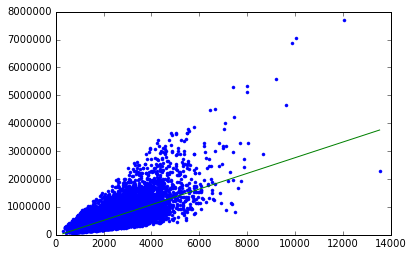

In [15]:
plt.plot(poly1_data["power_1"],sales["price"],'.',
        poly1_data["power_1"], model1.predict(poly1_data),'-')

Let's unpack that plt.plot() command. The first pair of DataFrame we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579.

### What if we wanted to plot a second degree polynomial?

In [16]:
poly2_data = polynomial_dframe(sales[["sqft_living"]], 2)

In [17]:
model2 = LinearRegression()
model2.fit(poly2_data,sales["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
model2_coef = np.append(model2.intercept_,model2.coef_)
print("model2_coef:",model2_coef)

model2_coef: [  1.99222279e+05   6.79940947e+01   3.85812609e-02]


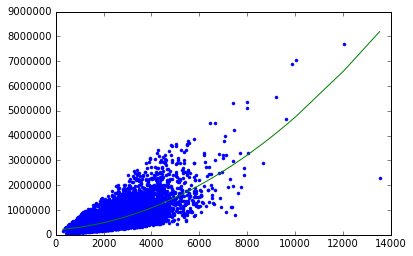

In [19]:
plt.plot(poly2_data["power_1"],sales["price"],'.',
        poly2_data["power_1"], model2.predict(poly2_data),'-')

The resulting model looks like half a parabola.

### Try on your own to see what the cubic looks like:

In [20]:
poly3_data = polynomial_dframe(sales[["sqft_living"]], 3)

In [21]:
model3 = LinearRegression()
model3.fit(poly3_data,sales["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
model3_coef = np.append(model3.intercept_,model3.coef_)
print("model3_coef:",model3_coef)

model3_coef: [  3.36819748e+05  -9.01819864e+01   8.70465089e-02  -3.84055260e-06]


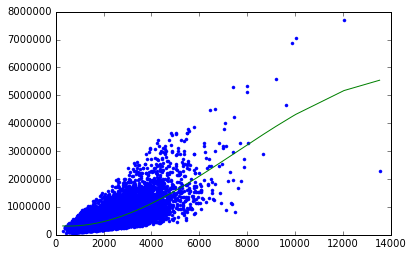

In [23]:
plt.plot(poly3_data["power_1"],sales["price"],'.',
        poly3_data["power_1"], model3.predict(poly3_data),'-')

### Now try a 15th degree polynomial:

In [24]:
poly15_data = polynomial_dframe(sales[["sqft_living"]], 15)

In [25]:
model15 = LinearRegression()
model15.fit(poly15_data,sales["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
model15_coef = np.append(model15.intercept_,model15.coef_)
print("model15_coef:",model15_coef)

model15_coef: [  5.37116330e+05   4.56404164e-91   6.91711888e-51  -5.84642842e-56
   0.00000000e+00   0.00000000e+00   2.68575170e-71   2.26147568e-67
   1.85900299e-63   1.47144116e-59   1.09771012e-55   7.43509038e-52
   4.23015578e-48   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


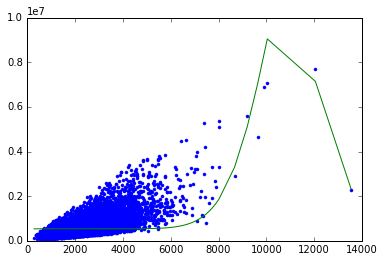

In [27]:
plt.plot(poly15_data["power_1"],sales["price"],'.',
        poly15_data["power_1"], model15.predict(poly15_data),'-');

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

### First load all 4 dataset (as we are not using graphlab)

In [29]:
sales_set1 = pd.read_csv("./data/wk3_kc_house_set_1_data.csv", dtype=sales_dtype)
sales_set2 = pd.read_csv("./data/wk3_kc_house_set_2_data.csv", dtype=sales_dtype)
sales_set3 = pd.read_csv("./data/wk3_kc_house_set_3_data.csv", dtype=sales_dtype)
sales_set4 = pd.read_csv("./data/wk3_kc_house_set_4_data.csv", dtype=sales_dtype)

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

### sales_set1

In [30]:
poly15_set1 = polynomial_dframe(sales_set1[["sqft_living"]], 15)

In [31]:
model15_set1 = LinearRegression()
model15_set1.fit(poly15_set1,sales_set1["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
model15_set1_coef = np.append(model15_set1.intercept_,model15_set1.coef_)
print("model15_set1_coef:",np.reshape(model15_set1_coef,(-1,1)))

model15_set1_coef: [[  5.39058819e+05]
 [  3.05794168e-90]
 [ -1.69394900e-49]
 [  2.35908952e-55]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.10358351e-70]
 [  8.37724029e-67]
 [  6.23411957e-63]
 [  4.49156442e-59]
 [  3.06938763e-55]
 [  1.91749300e-51]
 [  1.01335180e-47]
 [  3.62176959e-44]
 [ -5.63501661e-48]
 [  2.18641116e-52]]


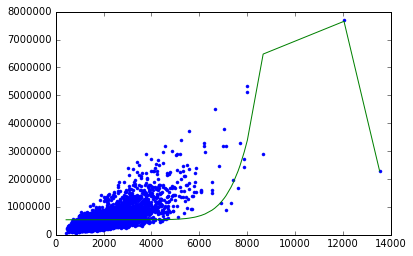

In [33]:
plt.plot(poly15_set1["power_1"],sales_set1["price"],'.',
        poly15_set1["power_1"], model15_set1.predict(poly15_set1),'-');

### sales_set2

In [46]:
poly15_set2 = polynomial_dframe(sales_set2[["sqft_living"]], 15)

In [47]:
model15_set2 = LinearRegression()
model15_set2.fit(poly15_set2,sales_set2["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
model15_set2_coef = np.append(model15_set2.intercept_,model15_set2.coef_)
print("model15_set2_coef:",np.reshape(model15_set2_coef,(-1,1)))

model15_set2_coef: [[  5.06738037e+05]
 [  2.71335943e-77]
 [  7.33542374e-39]
 [ -1.85052450e-44]
 [  1.39207183e-49]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  3.64549213e-55]
 [  1.50416255e-51]
 [  5.76015653e-48]
 [  1.95770493e-44]
 [  5.39396528e-41]
 [  9.40376341e-38]
 [ -3.63529134e-41]
 [  4.65476514e-45]
 [ -1.97197311e-49]]


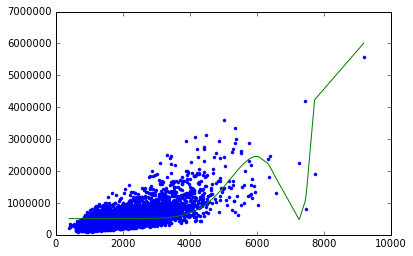

In [49]:
plt.plot(poly15_set2["power_1"],sales_set2["price"],'.',
        poly15_set2["power_1"], model15_set2.predict(poly15_set2),'-');

### sales_set3

In [50]:
poly15_set3 = polynomial_dframe(sales_set3[["sqft_living"]], 15)

In [51]:
model15_set3 = LinearRegression()
model15_set3.fit(poly15_set3,sales_set3["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
model15_set3_coef = np.append(model15_set3.intercept_,model15_set3.coef_)
print("model15_set3_coef:",np.reshape(model15_set3_coef,(-1,1)))

model15_set3_coef: [[  5.30874317e+05]
 [  2.83751934e-88]
 [ -7.80224148e-49]
 [ -1.38766438e-55]
 [  3.98272978e-59]
 [  0.00000000e+00]
 [  4.27894986e-69]
 [  2.68009626e-65]
 [  1.63911362e-61]
 [  9.66435015e-58]
 [  5.38044653e-54]
 [  2.72563636e-50]
 [  1.16253248e-46]
 [  3.33756141e-43]
 [ -6.76238818e-47]
 [  3.43132932e-51]]


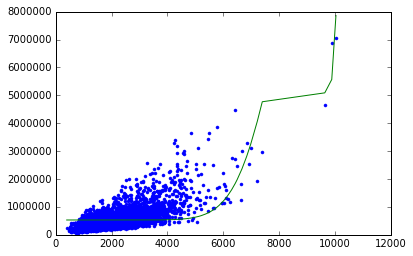

In [53]:
plt.plot(poly15_set3["power_1"],sales_set3["price"],'.',
        poly15_set3["power_1"], model15_set3.predict(poly15_set3),'-');

### sales_set4

In [54]:
poly15_set4 = polynomial_dframe(sales_set4[["sqft_living"]], 15)

In [55]:
model15_set4 = LinearRegression()
model15_set4.fit(poly15_set4,sales_set4["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
model15_set4_coef = np.append(model15_set4.intercept_,model15_set4.coef_)
print("model15_set4_coef:",np.reshape(model15_set4_coef,(-1,1)))

model15_set4_coef: [[  4.94853353e+05]
 [  1.37116050e-76]
 [  2.79678944e-40]
 [ -4.25065052e-44]
 [  6.08163411e-50]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.27070051e-54]
 [  4.87868972e-51]
 [  1.73549022e-47]
 [  5.47058320e-44]
 [  1.39587599e-40]
 [  2.25041871e-37]
 [ -9.43954119e-41]
 [  1.31573060e-44]
 [ -6.09165883e-49]]


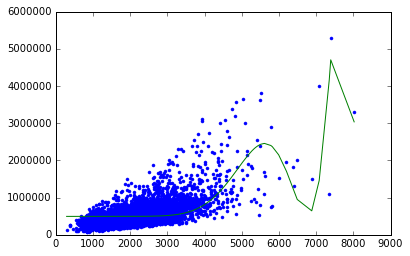

In [57]:
plt.plot(poly15_set4["power_1"],sales_set4["price"],'.',
        poly15_set4["power_1"], model15_set4.predict(poly15_set4),'-');

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

In [60]:
print(model15_set1_coef[15])
print(model15_set2_coef[15])
print(model15_set3_coef[15])
print(model15_set4_coef[15])

2.18641116418e-52
-1.97197311145e-49
3.43132932053e-51
-6.09165883427e-49


No, they are not the same!

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**

No, they don't look the same!

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

### Loading the dataset

Loading the dataset from files provided for the class as not using GraphLab

In [61]:
sales_train = pd.read_csv("./data/wk3_kc_house_train_data.csv", dtype=sales_dtype)
sales_valid = pd.read_csv("./data/wk3_kc_house_valid_data.csv", dtype=sales_dtype)
sales_test = pd.read_csv("./data/wk3_kc_house_test_data.csv", dtype=sales_dtype)

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

Create an empy DataFrame to hold RSS values for each model.

In [83]:
rss_valid_df = pd.DataFrame(np.zeros((15,1)), index=np.arange(1,15+1), columns=["RSS"])

In [84]:
for power in range(1, 15+1):
    # create polynomial features on TRAINING data
    X_train = polynomial_dframe(sales_train[["sqft_living"]], power)
    
    # fit our model on TRAINING data
    model = LinearRegression()
    model.fit(X_train, sales_train["price"])
    
    # Calculate RSS on VALIDATION data and store in rss_df DataFrame
    # First get X_valid
    X_valid = polynomial_dframe(sales_valid[["sqft_living"]], power)
    rss_valid_df.loc[power] = (np.square(sales_valid["price"] - model.predict(X_valid)).sum())

**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

In [85]:
print("RSS min value is:", rss_valid_df.min(),"for power:",rss_valid_df.idxmin())

RSS min value is: RSS    5.662686e+14
dtype: float64 for power: RSS    6
dtype: int64


Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data.

In [81]:
# create polynomial features of power=6 on TEST data
X_train = polynomial_dframe(sales_train[["sqft_living"]], 6)

# fit our model power=6 on TRAINING data
model = LinearRegression()
model.fit(X_train, sales_train["price"])

# Calculate RSS on TEST data
# First get X_test
X_test = polynomial_dframe(sales_test[["sqft_living"]], 6)
rss_test = (np.square(sales_test["price"] - model.predict(X_test)).sum())

**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**

In [82]:
print("RSS value on TEST data for power=6:", rss_test)

RSS value on TEST data for power=6: 135225114555012.08
